


<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Agent and Multi-Agent Systems </center>
    <center> PW2 : The mesa plateform
    </center>
<hr style=" border:none; height:3px;">
</h1>



In [ ]:
!pip install mesa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
import mesa

### 1. Setting up the project

## Mesa Basics

Implementing a multi-agent system in Mesa requires to define two core classes:

- One for multiagent platform: it will inherit the `Mesa Model` class;
- The other for the agents: it will inherit the `Mesa Agent` class.

### Create Agent

First create the agent.

- Agents are the individual entities that act in the model. Mesa automatically assigns each agent that is created an integer as a `unique_id.`

- The implementation is done by creating a new class (or object) that extends `mesa.Agent` creating a subclass of  the `Agent` class from mesa. The new class is named `MyAgent`. The inherited code of the Mesa agent object.

### Create Model

Next, create the model. This gives us the two basic classes of any Mesa ABM - the agent class (population of agent objects that doing something) and the manager class (a model object that manages the creation, activation, datacollection etc of the agents)

- The model can be visualized as a list containing all the agents. The model creates, holds and manages all the agent objects, specifically in a dictionary. The model activates agents in discrete time steps.

-  When a model is created the number of agents within the model is specified. The model then creates the agents and places them in a set of agents.

- The implementation is done by creating a new class (or object) that extends `mesa.Model` and calls `super().__init__()`, creating a subclass of the `Model` class from mesa. The new class is named `MyModel`.  A critical point is that you can use the `seed` kwarg (keyword argument) to set a seed which controls the random number generator of the model class allowing for the reproducibility of results.


### Making the Agents `do`

With the basics of the Agent class and Model class created we can now activate the agents to `do` things

-  Mesa's `do` function calls agent functions to grow your ABM. A step is the smallest unit of time in the model, and is often referred to as a tick. The `do` function and Python functionality can be configured to activate agents in different orders. This can be important as the order in which agents are activated can impact the results of the model. At each step of the model, one or more of the agents -- usually all of them -- are activated and take their own step, changing internally and/or interacting with one another or the environment.

- For the following,  we will randomly reorder the Agent activation order using  `mesa.Agent.shuffle_do` and have the agents `step` function print the agent's unique id that they were assigned during the agent creation process.

-  Using standard ABM convention we add a `step` function to the `MyModel` class which calls the `mesa.Agent.shuffle_do` function. We then pass into `shuffle_do` the parameter "step". This tells mesa to look for and execute the `step` function in our MyAgent class.  


In [ ]:
#DO NOT EXECUTE
from mesa import Agent
from mesa import Model


class MyAgent(Agent):
    def __init__(self, model):
      """Create a new agent.

        Args:
            model (Model): The model instance that contains the agent
        """
      super().__init__(model)

        #... define local variables here ...
    def step(self):
        #... define the perception-deliberation-action loop here ...
        pass

#and now let's create a MAS


class MyModel(Model):
    def __init__(self, some_arg_I_need, seed=None, some_kwarg_I_need=True):
        super().__init__(seed=seed)  # Calling super is now required, passing seed is highly recommended
        # Your model initialization code here
        # this code uses some_arg_I_need and my_init_kwarg


        # we need to create agent
        newagent = MyAgent(self) #

        #... do the same for all agents ...

    def step(self):
        self.agents.shuffle_do("step")  # Activate all agents in random order




# This is how you start the MAS:
newmodel= MyModel()


<div class="alert alert-block alert-info">

 <b>Questions</b>
    
Based on the above example, implement a simple Mesa multi-agent system with `N` agents that all have some internal variable with an initial value of `0`. The agents' ids will range from`0` to `N-1`. The procedural loop of the agents performs two actions:

- Increase the value of the internal value by `1`;
- Print the agent's number and its current internal value.

Running three steps of the system with `N=4` should produce the following output (with the agents in random a order):
</div>



Agent 2 has value 1

Agent 3 has value 1

Agent 1 has value 1

Agent 0 has value 1

Agent 1 has value 2

Agent 2 has value 2

Agent 3 has value 2

Agent 0 has value 2

Agent 0 has value 3

Agent 1 has value 3

Agent 3 has value 3

Agent 2 has value 3

In [20]:
#Answer

from mesa import Agent, Model


class MyAgent(Agent):
    def __init__(self, model):
        super().__init__(model)
        self.v = 0;

    def increase_value(self): # the step of the agent
        self.v=self.v+1;
        print("Agent "+str(self.unique_id)+" has value "+str(self.v))

class MyModel(Model):
    def __init__(self, N, seed=None):
        super().__init__(seed=seed)
        for i in range(N):
            newagent = MyAgent(self)


    def step(self):
      self.agents.shuffle_do("increase_value")




In [21]:
#Running the Model
starter_model = MyModel(4)
for i in range(3):
  starter_model.step()

Agent 1 has value 1
Agent 4 has value 1
Agent 3 has value 1
Agent 2 has value 1
Agent 3 has value 2
Agent 4 has value 2
Agent 1 has value 2
Agent 2 has value 2
Agent 2 has value 3
Agent 3 has value 3
Agent 4 has value 3
Agent 1 has value 3


In [27]:
# Challenge: Change the seed from None to a number like 42 and see the impact

In [ ]:
# Challenge: Change `shuffle_do` to just `do` and see the impact

### 2. The Money Example

Our goal is to implement the model that explores the distribution of wealth under a trading population of agents.

The assumption that govern this model are:

1. There are some number of agents.
2. All agents begin with 1 unit of money.
3. At every step of the model, an agent gives 1 unit of money (if they
   have it) to some other agent.

 We will see that this random interaction will create an inequality of wealth that follows a Boltzmann distribution (http://www.phys.ufl.edu/~meisel/Boltzmann.pdf).

Thus,  we want the agent to adopt the following behaviour at each step of their execution (i.e. in their procedural loop):

- Check their wealth;
- If they have the money, give one unit of it away to another random agent.




-------
Note
To allow the agent to choose another agent at random, we shall use the `model.random` random-number generator. This works just like Python’s `random` module, but with a fixed seed set when the model is instantiated, that can be used to replicate a specific model run later. To access an agent's wealth, we can use the model's internal list of all the agents it is scheduled to activate.

Note that agents also have a `self.random` attribute that refers to `self.model.random`.

------

In [ ]:
#Do not execute
other_agent = self.random.choice(self.model.agents)
other_agent.any_method()

<div class="alert alert-block alert-info">

 <b>Questions</b>
    
- Write a class `MoneyAgent` that implements an agent with the above behaviour.
- This code violates one of the principles of MAS we have discussed in this course. Which one?
</div>

In [ ]:
#Answer

from mesa import Agent, Model

class MoneyAgent(Agent):
    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def exchange(self):
        if self.wealth>0:
            other_agent = self.random.choice(self.model.agents)
            other_agent.wealth += 1
            self.wealth -= 1

<div class="alert alert-block alert-danger">
Answer: This code violates the encapsulation principle :
one agent should not change another agent's internal variable.
However, since we did not implement any communication mechanism for now,
there is no other way to have this action performed. More to come on the next sessions of the course.
</div>

#### The Money MAS model

<div class="alert alert-block alert-info">

 <b>Questions</b>

Implement a `MoneyModel` class that creates `N` money-agents. Run some steps of the MAS and store the resulting value of `wealth` for each agent into a Python list. You can then display the result using the matplotlib library:
    
 </div>

In [31]:
#Answer


from mesa import Agent, Model


class MoneyAgent(Agent):
    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def exchange(self):
        if self.wealth>0:
            other_agent = self.random.choice(self.model.agents)
            other_agent.wealth += 1
            self.wealth -= 1

class MoneyModel(Model):
    def __init__(self, N, seed=None):
        super().__init__(seed=seed)

        self.num_agents = N


        for i in range(self.num_agents):
            a = MoneyAgent(self)


    def step(self):
        self.agents.shuffle_do("exchange")

    def get_all_agents_wealth(self):
        return [a.wealth for a in self.agents]




In [32]:
# main code

model = MoneyModel(10)  # 10 agents in our example
for _ in range(20):
    model.step()

all_wealth = model.get_all_agents_wealth()

print(all_wealth)


[1, 3, 1, 0, 2, 0, 2, 1, 0, 0]


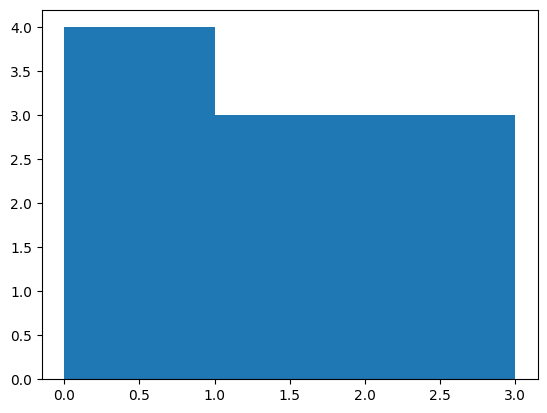

In [33]:
import matplotlib.pyplot as plt

plt.hist(all_wealth,bins=range(max(all_wealth)+1))
plt.show()

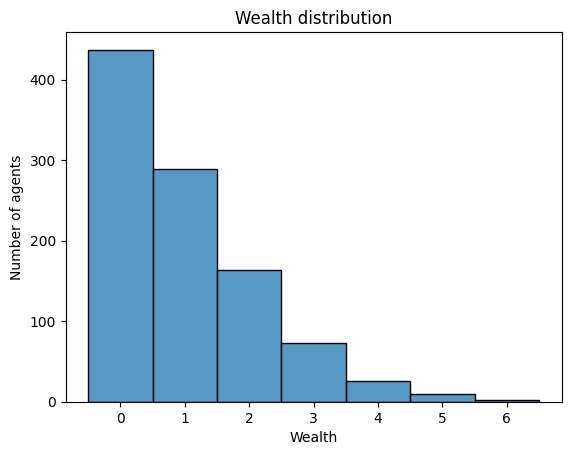

In [34]:
import seaborn as sns
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="Number of agents");

### 3. Adding a spatial environment

Many ABMs have a spatial element, with agents moving around and interacting with nearby neighbors. Mesa has several types of [spaces](https://mesa.readthedocs.io/latest/apis/space.html) from different types of grids to networks to an in development [cell_space](https://mesa.readthedocs.io/latest/apis/experimental.html#module-experimental.cell_space.__init__). Mesa grids are divided into cells, and agents can only be on a particular cell, like pieces on a chess board. Continuous space, in contrast, allows agents to have any arbitrary position. (Think of grids vs continuous space like the difference between integers and decimals).

Both grids and continuous spaces are frequently [toroidal](https://en.wikipedia.org/wiki/Toroidal_graph), meaning that the edges wrap around, with cells on the right edge connected to those on the left edge, and the top to the bottom. This prevents some cells having fewer neighbors than others, or agents being able to go off the edge of the environment. You can envision a torous by thinking of donut.

Mesa has two main types of grids: `SingleGrid` and `MultiGrid`. `SingleGrid` enforces at most one agent per cell; `MultiGrid` allows multiple agents to be in the same cell. We are going to use `MultiGrid` and then only exchange money with agents in the same cell.

In our simple model, we will use a grid space in which agents walk at random. Instead of giving their unit of money to any random agent, they will give it to an agent on the same cell. We shall use the Mesa `MultiGrid` class that allows multiple agents to be in the same cell (as opposed to `SimpleGrid` which only allows one agent at a time in each cell). Its constructor receives `width` and `height` parameters, and a `boolean` as to whether the grid is toroidal. We can place agents on a grid with the grid’s `place_agent` method, which takes an agent and an `(x, y)` tuple of the coordinates to place the agent.

We get a random integer within the width and height of the grid space and the use Mesa's multigrid `place_agent` function to place the agent in the specified grid location.

In [ ]:
#Example do not execute

from mesa.space import MultiGrid

grid = MultiGrid(width, height, torus=True)

grid.place_agent(agent, (x, y))

All these method should be invoked in the model, at the agents’ creation level.

Each agent is now provided with a `self.pos` variable that indicates its position in the grid. Moving an agent in the space (i.e. changing its position’s value) is done with the `move_agent` method, which is typically invoked in the agent’s `step` method. It takes as parameter the agent and its new position.

In [ ]:
# This code is invoked from within the Agent class :
# - self is the agent
# - self.model is the agent model
# - self.model.grid is the model's grid space
# - new_position is a tuple

self.model.grid.move_agent(self, new_position)

Instead of computing the possible positions manually, you can use the `get_neighbrhood` method which returns all the neighbors of a given cell. This method can get two types of cell neighborhoods: *Moore* (including diagonals), and *Von Neumann* (only up/down/left/right). It also needs an argument as to whether to include the center cell itself as one of the neighbors.

In [ ]:
#Example do not execute
"""Move the agent to a random neighboring cell."""
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

Last but not least, one can get the list of agents that occupy a given cell with:

In [ ]:
#Example do not execute

#a random agent in the same cell.

cellmates = self.model.grid.get_cell_list_contents([self.pos])

# Remove self from potential recipients
cellmates.pop(cellmates.index(self))

#cellmates is a list of agents.

<div class="alert alert-block alert-info">

 <b>Questions</b>

Modify the previous code (MoneyMAS model) so that :

- The model receives a `width` and `height` as parameters to initiate a toroidal grid space;
- All agents are positioned randomly in the space;
- At each step, all agents move randomly and then exchange `wealth` with the agents that share their current cell.

 To make your code easier to read, we recommend that you write two methods in your `MoneyAgent` class:

- The `move` method moves the agent to one of its neighbouring cells;
- The `share` method modifies the wealth.
    
 </div>

In [28]:
#Answer

from mesa import Agent, Model
from mesa.space import MultiGrid

class MoneyAgent(Agent):
    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def move(self):
        """Move the agent to a random neighboring cell."""
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        # Ensure agent is not giving money to itself
        cellmates.pop(cellmates.index(self))
        if len(cellmates) > 0:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1


class MoneyModel(Model):
    def __init__(self, N=100, width=10, height=10, seed=None):
        """Initialize the model.

        Args:
            n (int, optional): Number of agents. Defaults to 100.
            width (int, optional): Grid width. Defaults to 10.
            height (int, optional): Grid height. Defaults to 10.
            seed (int, optional): Random seed. Defaults to None.
        """
        super().__init__(seed=seed)
        self.num_agents = N

        self.grid = MultiGrid(width, height, torus=True)
        for _ in range(self.num_agents):
            agent = MoneyAgent(self)

            # Add agent to random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(agent, (x, y))

        self.running = True

    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")


    def get_all_agents_wealth(self):
        return [a.wealth for a in self.agents]





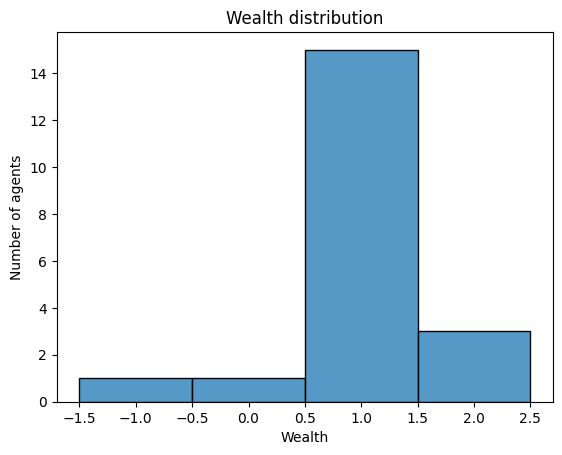

In [29]:

model = MoneyModel(20, 10, 10)
for _ in range(50):
    model.step()


agent_wealth = [a.wealth for a in model.agents]
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True)
g.set(
    title="Wealth distribution", xlabel="Wealth", ylabel="Number of agents"
);  # The semicolon is just to avoid printing the object representation



#### Viewing the spatial environment


Viewing the position of agents might be interesting in such a multi-agent system. We can do it quite easily with the `matplotlib` and `numpy` libraries. We create a `numpy` array of the same size as the grid, filled with zeros. Then we use the `coord_iter` method in the `grid` object, which lets us loop over every cell in the grid, giving us each cell’s coordinates and contents in turn.

In [35]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
# Plot using seaborn, with a visual size of 5x5
g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(5, 5)
g.set(title="number of agents on each cell of the grid");

AttributeError: 'MoneyModel' object has no attribute 'grid'

In [ ]:
# Challenge: Change the size of the grid

In [ ]:
# Challenge: Change from multigrid to grid (only one agent per cell)